In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from operator import add

In [2]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

In [3]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
len(df)

74745

In [5]:
# how many accidents result in injury or death?
serious_accidents = df.loc[df["NUMBER OF PERSONS INJURED"] + df["NUMBER OF PERSONS KILLED"] > 0]
num_serious_accidents = len(serious_accidents)
print(f"{len(serious_accidents) / len(df) * 100} percent of collisions resulted in injury or death")


# PIE CHART -- NO LISTED INJURY / INJURY / DEATH

43.87718242022878 percent of collisions resulted in injury or death


In [12]:
# what are streets in accident?
street_counts = serious_accidents.value_counts(["ON STREET NAME"])
print(street_counts[:10])

streets = street_counts[:10].index.to_list()
streets = [street[0] for street in streets]

street_collisions = street_counts[:10].to_list()

ON STREET NAME            
BELT PARKWAY                  505
LONG ISLAND EXPRESSWAY        382
BROOKLYN QUEENS EXPRESSWAY    355
BROADWAY                      328
GRAND CENTRAL PKWY            274
CROSS ISLAND PARKWAY          236
LINDEN BOULEVARD              228
FDR DRIVE                     223
ATLANTIC AVENUE               210
VAN WYCK EXPWY                203
Name: count, dtype: int64


In [13]:
# reduce considered data to top 10 collision street
serious_accidents = serious_accidents.loc[serious_accidents["ON STREET NAME"].isin(streets)]
print(f"{len(serious_accidents) / num_serious_accidents * 100} percent of all serious collisions occur in only 10 locations")

8.976704476155628 percent of all serious collisions occur in only 10 locations


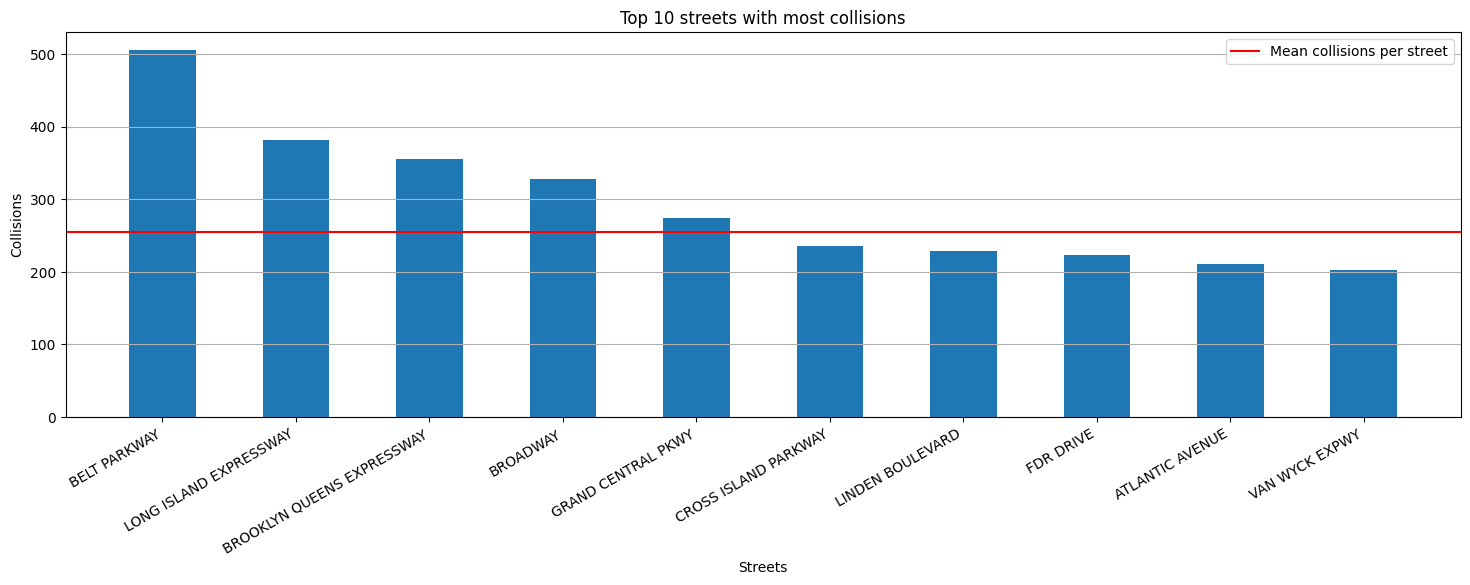

<Figure size 640x480 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.bar(streets, street_counts[:10], width=.5, tick_label=streets)
f = plt.figure()

ax.set_ylabel('Collisions')
ax.set_xlabel("Streets")
ax.set_title('Top 10 streets with most collisions')
ax.set_xticklabels(streets, rotation=30, ha='right')
ax.yaxis.grid(True)


median = statistics.median(street_collisions)
ax.axhline(median, color='r', linestyle='-')

ax.legend(['Mean collisions per street'])

plt.show()

In [16]:
# what are contributing factors to accidents on these streets?
factors = serious_accidents.value_counts(["CONTRIBUTING FACTOR VEHICLE 1"])[:10]
factors

CONTRIBUTING FACTOR VEHICLE 1 
Driver Inattention/Distraction    647
Following Too Closely             530
Unspecified                       506
Unsafe Speed                      213
Unsafe Lane Changing              145
Failure to Yield Right-of-Way     131
Passing or Lane Usage Improper    124
Other Vehicular                   109
Reaction to Uninvolved Vehicle     89
Driver Inexperience                63
Name: count, dtype: int64

Text(0.5, 1.0, 'Contributing factors of vehicle collisions')

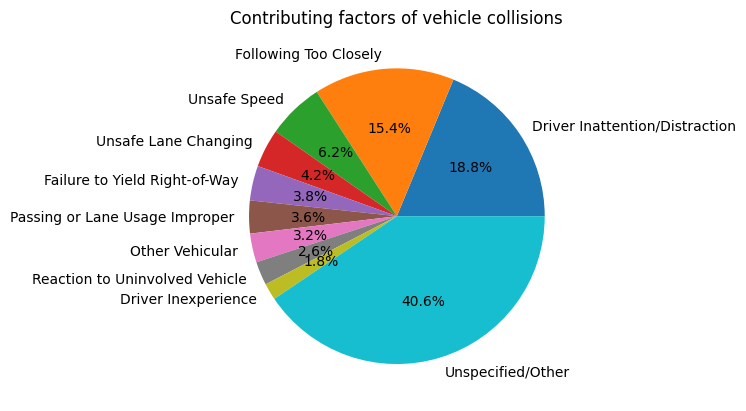

In [17]:
labels = factors.index.to_list()
labels = [label[0] for label in labels]
labels[2] = "Unspecified/Other"

collisions = factors.to_list()
collisions[2] += len(serious_accidents) - sum(collisions[:2]) - sum(collisions[3:])

# move unspecified/other to end of lists

unspec_label = labels.pop(2)
labels.append(unspec_label)

unspec_collision = collisions.pop(2)
collisions.append(unspec_collision)

fig, ax = plt.subplots()
ax.pie(collisions, labels=labels, autopct='%1.1f%%')
ax.set_title('Contributing factors of vehicle collisions')

In [18]:
# what type of vehicles are involved in these crashes?
serious_accidents.value_counts(["VEHICLE TYPE CODE 1"])[:10]

VEHICLE TYPE CODE 1                
Sedan                                  1337
Station Wagon/Sport Utility Vehicle    1007
Taxi                                     97
Motorcycle                               85
Pick-up Truck                            65
Box Truck                                55
Tractor Truck Diesel                     48
Bike                                     38
Bus                                      31
Moped                                    30
Name: count, dtype: int64

In [19]:
# what is the most common time for an accident?
times = serious_accidents["CRASH TIME"].tolist()

In [20]:
times = [time.split(":")[0] for time in times]
print(len(times))

2944


In [21]:
time_series = pd.Series(times)
time_df = pd.DataFrame(time_series.value_counts())

time_df

,count
8,166
0,161
14,155
21,155
22,145
20,138
23,138
10,137
15,136
18,131


In [22]:
times = list(time_df.index)
times = [int(time) for time in times]

collisions = list(time_df["count"])

hour_data = list(zip(times, collisions))
hour_data

[(8, 166),
 (0, 161),
 (14, 155),
 (21, 155),
 (22, 145),
 (20, 138),
 (23, 138),
 (10, 137),
 (15, 136),
 (18, 131),
 (16, 131),
 (17, 130),
 (12, 127),
 (9, 126),
 (6, 123),
 (7, 119),
 (13, 111),
 (19, 104),
 (11, 100),
 (5, 97),
 (1, 97),
 (4, 76),
 (2, 71),
 (3, 70)]

In [23]:
def sort_by_first_element(lst): 
 
    return sorted(lst, key = lambda x: x[0], reverse=False)

hour_data = sort_by_first_element(hour_data)
hour_data

[(0, 161),
 (1, 97),
 (2, 71),
 (3, 70),
 (4, 76),
 (5, 97),
 (6, 123),
 (7, 119),
 (8, 166),
 (9, 126),
 (10, 137),
 (11, 100),
 (12, 127),
 (13, 111),
 (14, 155),
 (15, 136),
 (16, 131),
 (17, 130),
 (18, 131),
 (19, 104),
 (20, 138),
 (21, 155),
 (22, 145),
 (23, 138)]

In [24]:
times = [tup[0] for tup in hour_data]
collisions = [tup[1] for tup in hour_data]

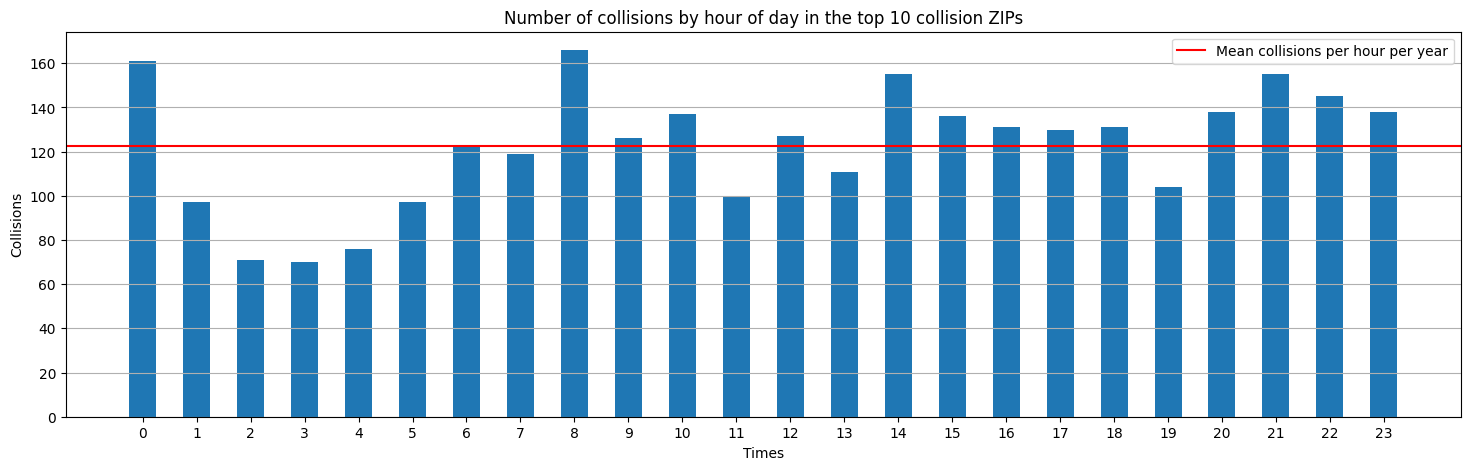

<Figure size 640x480 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.bar(times, collisions, width=.5, tick_label=times)
# plt.xticks(rotation=45)
# plt.axhline(68, color="r")
f = plt.figure()

ax.set_ylabel('Collisions')
ax.set_xlabel("Times")
ax.set_title('Number of collisions by hour of day in the top 10 collision ZIPs')
ax.yaxis.grid(True)

mean = statistics.mean(collisions)
ax.axhline(mean, color='r', linestyle='-')

ax.legend(['Mean collisions per hour per year'])

plt.show()

In [26]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [27]:
# get all the coordinate locations of collisions
coordinate_df = df[["LATITUDE", "LONGITUDE"]]
coordinate_df = coordinate_df.dropna(axis="index")
# coordinate_df = coordinate_df.reindex()

geometry = [Point(xy) for xy in zip(coordinate_df['LONGITUDE'], coordinate_df['LATITUDE'])]
geometry[:20]

[<POINT (-73.847 40.686)>,
 <POINT (-73.914 40.73)>,
 <POINT (-73.883 40.666)>,
 <POINT (-73.786 40.672)>,
 <POINT (-74.007 40.614)>,
 <POINT (-73.925 40.732)>,
 <POINT (-74.098 40.611)>,
 <POINT (-73.913 40.872)>,
 <POINT (-73.939 40.791)>,
 <POINT (-73.76 40.679)>,
 <POINT (-73.92 40.699)>,
 <POINT (-73.901 40.722)>,
 <POINT (-73.833 40.679)>,
 <POINT (-73.956 40.814)>,
 <POINT (-73.901 40.845)>,
 <POINT (-73.948 40.651)>,
 <POINT (-73.735 40.672)>,
 <POINT (-73.853 40.883)>,
 <POINT (-74.013 40.633)>,
 <POINT (-73.991 40.717)>]

In [28]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(coordinate_df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/milo/Documents/data_analysis/nyc-collisions/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,LATITUDE,LONGITUDE,geometry
3,40.685920,-73.846924,POINT (-73.84692 40.68592)
4,40.730442,-73.913670,POINT (-73.91367 40.73044)
5,40.666430,-73.882835,POINT (-73.88284 40.66643)
7,40.672382,-73.785740,POINT (-73.78574 40.67238)
8,40.613680,-74.007150,POINT (-74.00715 40.61368)


In [29]:
map = gpd.read_file("dcm_20240331shp/DCM.shp")

<Axes: >

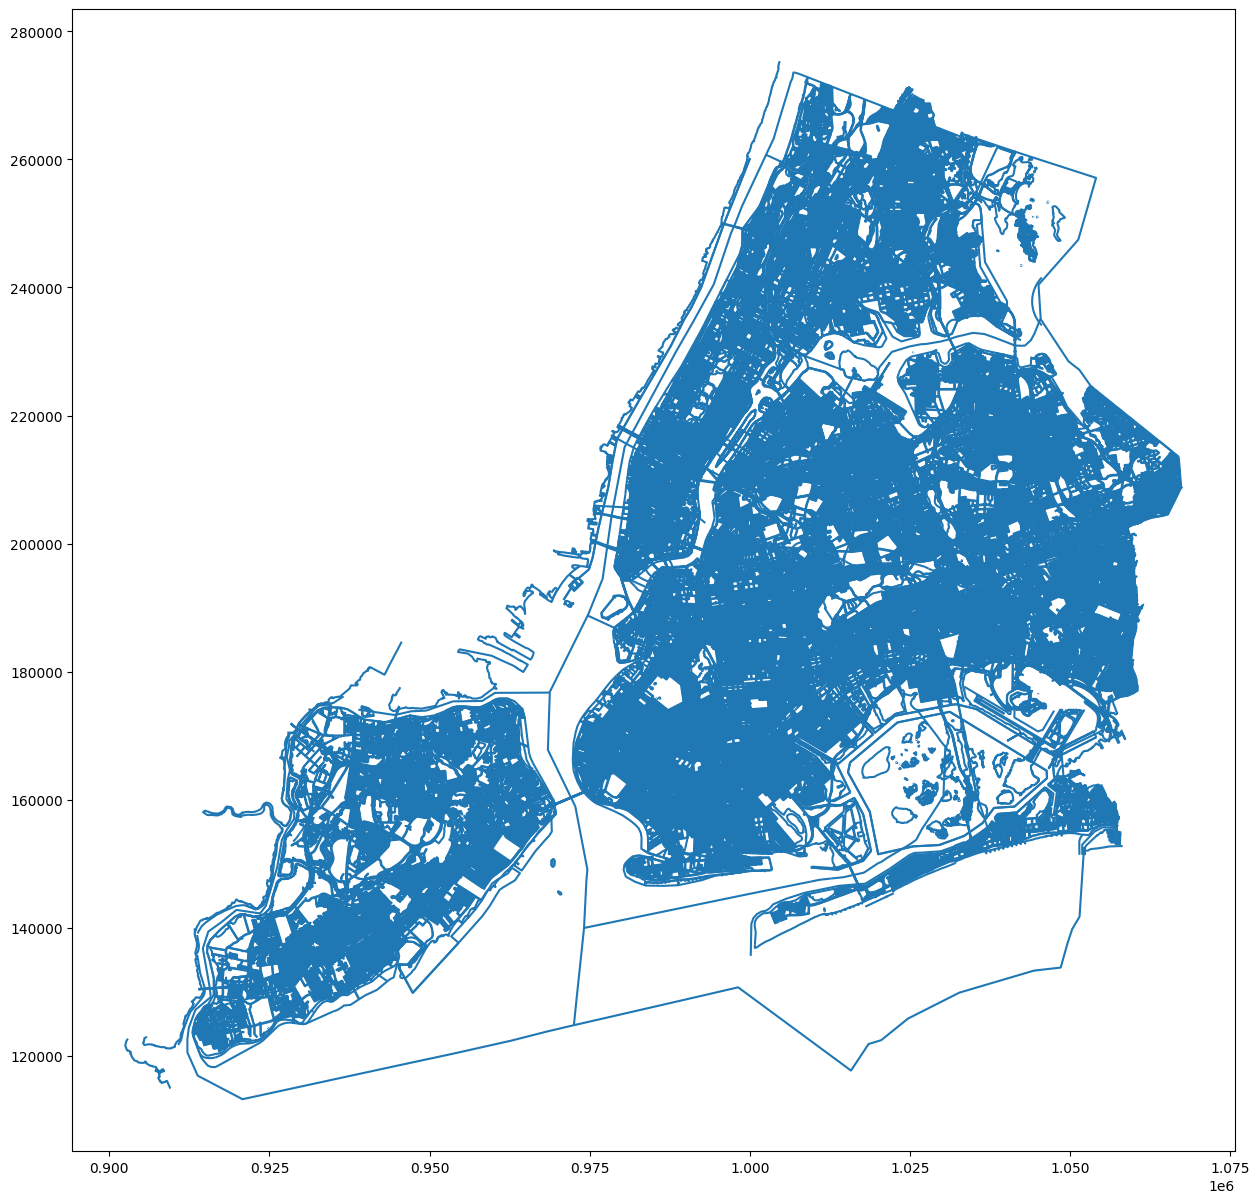

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax)

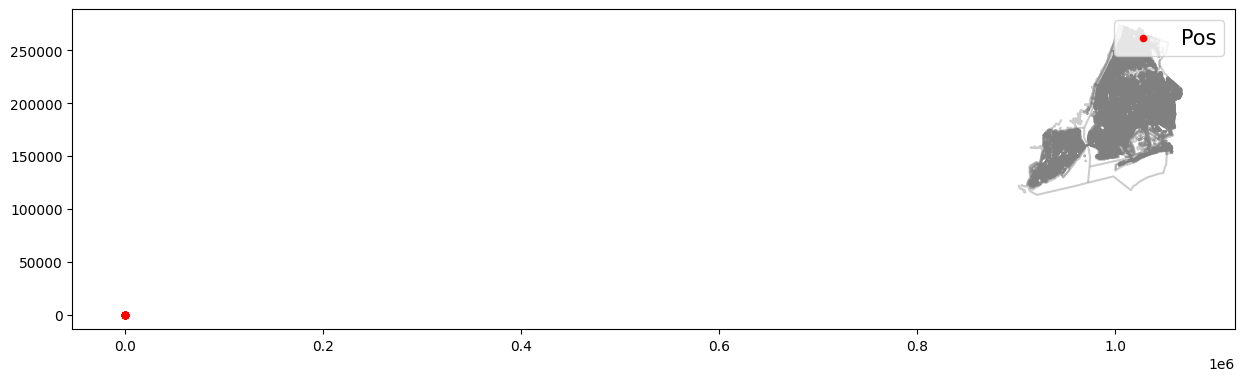

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       label='Pos')
plt.legend(prop={'size':15})